<a href="https://colab.research.google.com/github/SANDRAKUMI/hello-world/blob/master/sandy_cnn_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training Data ::: Images Shape: (60000, 28, 28), Labels Shape: (60000,)
Test Data ::: Images Shape: (10000, 28, 28), Labels Shape: (10000,)


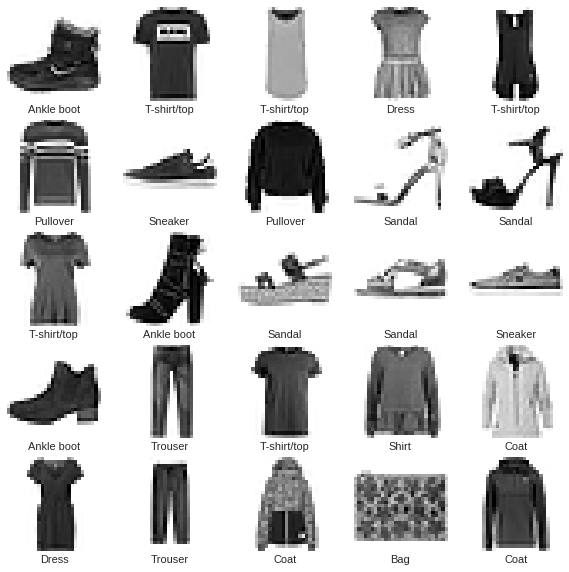

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 3, 3, 128)         73856     
_________________________________________________________________
dropout_2 (Dropout)          (None, 3, 3, 128)         0         
__________

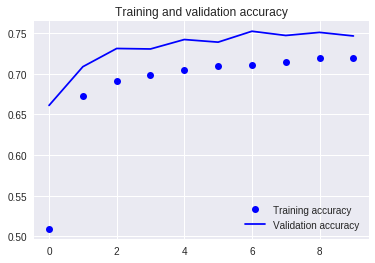

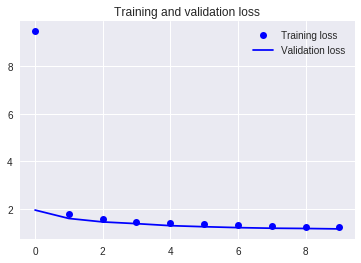

In [0]:
#Importing libraries
from __future__ import absolute_import
from __future__ import print_function
from __future__ import division


import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Lambda
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras import regularizers
from keras.layers import BatchNormalization
from keras.optimizers import Adam
from keras.optimizers import Adagrad
from keras.callbacks import TensorBoard

#importing Fashion_Mnist Datasets
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

#Categorizing data
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress',
                   'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

#Display information in datasets
print("Training Data ::: Images Shape: {}, Labels Shape: {}".format(
        train_images.shape, train_labels.shape))
print("Test Data ::: Images Shape: {}, Labels Shape: {}".format(
        test_images.shape, test_labels.shape))

#Plot Datasets
plt.figure(figsize=(10, 10))
for i in range(25):
  rand_image_idx = np.random.randint(0, train_labels.shape[0])
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

#Preprocess data

#performing mean on datasets
train_images_mean = np.mean(train_images)
train_images_stdev =np.std(train_images)
train_images,test_images = train_images - train_images_mean/train_images_stdev, test_images- train_images_mean / train_images_stdev


# Further break training data into train / validation sets (# put 5000 into validation set and keep remaining 55,000 for train)
(train_images, valid_images) = train_images[5000:], train_images[:5000] 
(train_labels, valid_labels) = train_labels[5000:], train_labels[:5000]

#Reshaping Data
w, h = 28, 28
train_images = train_images.reshape(train_images.shape[0], w, h, 1)
valid_images = valid_images.reshape(valid_images.shape[0], w, h, 1)
test_images = test_images.reshape(test_images.shape[0], w, h, 1)

#normalizing
train_images = train_images.astype('float32')
test_images = test_images.astype('float32')
valid_images = valid_images.astype('float32')
train_images /= 255
test_images /= 255
valid_images /= 255

# One-hot encode the labels
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
valid_labels = tf.keras.utils.to_categorical(valid_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)

#Building model
batch_size = 128
num_classes = 10
epochs = 10
input_shape = (28,28, 1)

model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='selu',
                 kernel_initializer='he_uniform',
                 input_shape=input_shape)
         )
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='selu', kernel_regularizer=regularizers.l1(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='selu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128, activation='selu', kernel_regularizer=regularizers.l1(0.01)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer='adagrad',
             metrics=['accuracy'])
model.summary()

#train the model
history = model.fit(train_images, train_labels,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(valid_images, valid_labels)
            )
score = model.evaluate(test_images, test_labels, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])

predictions = model.predict(test_images)
predictions[0]

import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
